In [1]:

import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf
import tensorflow as tf
  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

c:\Users\sneha sucharitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import zipfile

# Path to your zip file
zip_path = "dataset.zip"  # <-- Change this if your zip name is different
extract_to = "dataset"

# Unzipping process
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset unzipped successfully into:", extract_to)


✅ Dataset unzipped successfully into: dataset


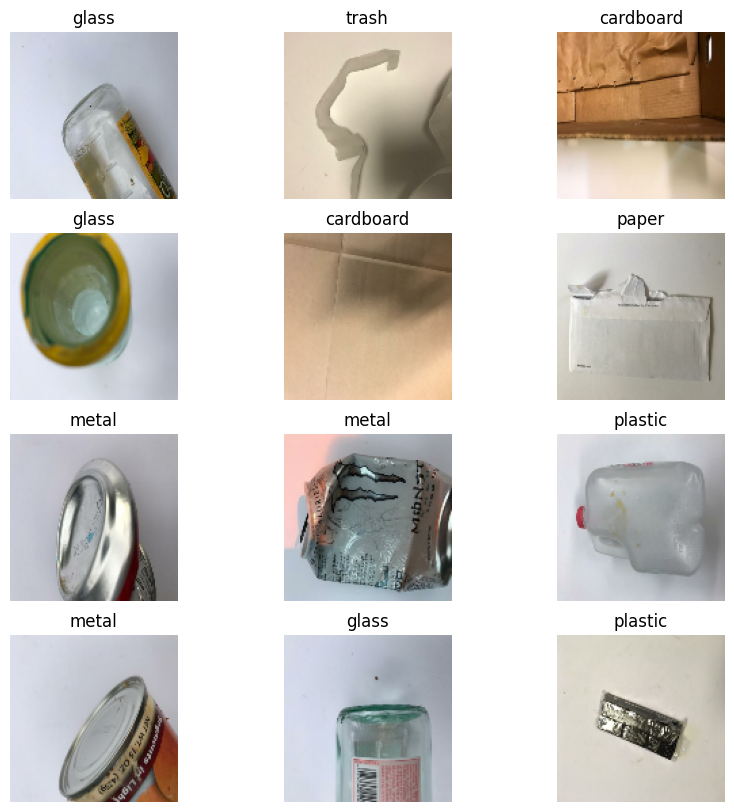

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [3]:
dataset_dir = r"dataset/dataset"

image_size = (124, 124)
batch_size = 32
seed = 42

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# Save class names BEFORE applying .map or .cache
class_names = train_ds.class_names
print("Class names:", class_names)
print("Number of classes:", len(class_names))


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


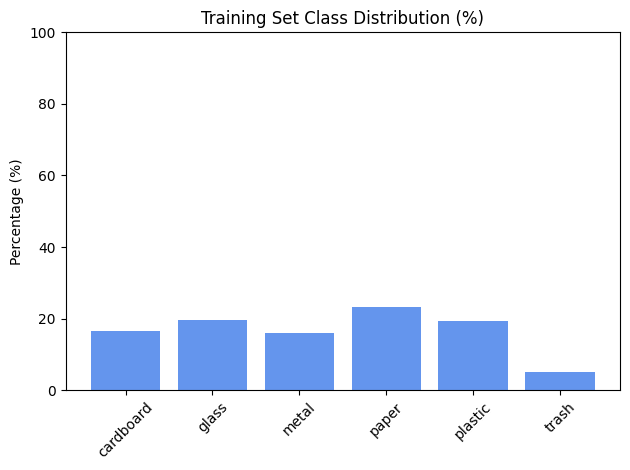

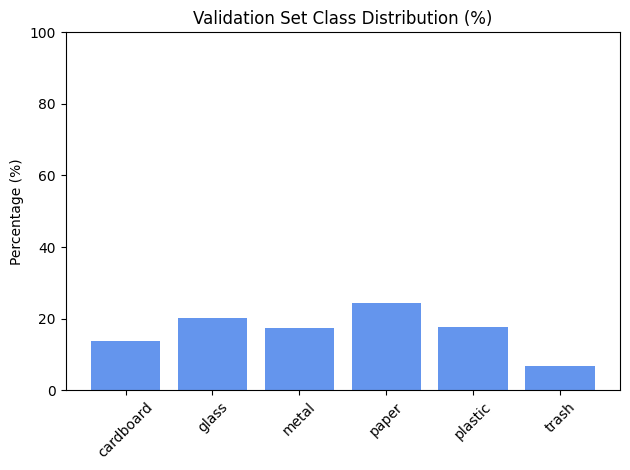

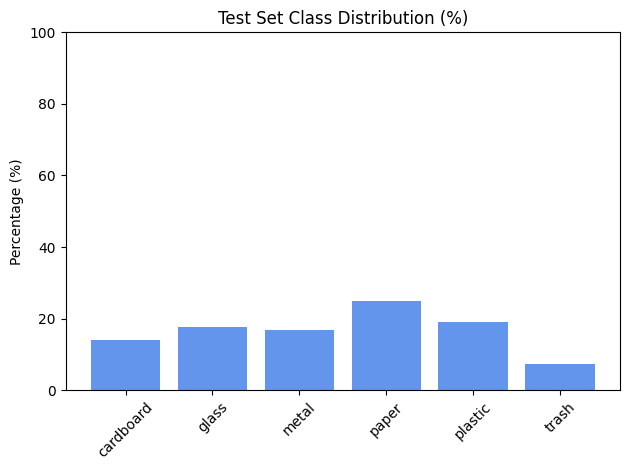

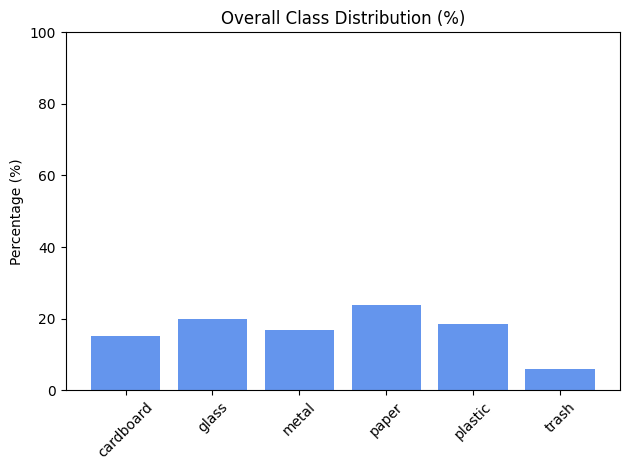

In [62]:
# Show visualizations
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# ✅ Store class names before .map()
class_names = train_ds.class_names


Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# Save class names BEFORE applying .map or .cache
class_names = train_ds.class_names
print("Class names:", class_names)
print("Number of classes:", len(class_names))


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


In [19]:
print(class_names)
print(len(class_names))


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


In [20]:
class_names = train_ds.class_names  # Store this early


In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))


Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [22]:

# ✅ Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [23]:


import gdown
import zipfile
import os

# Download from Google Drive
file_id = "1dEew1Hv-IWv9KFNkMw0c8ncYY_l8d_Dz"
url = f"https://drive.google.com/uc?id={file_id}"
output = "garbage-dataset.zip"

gdown.download(url, output, quiet=False)

# Unzip the dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("garbage-dataset")

print("✅ Dataset downloaded and extracted.")


Downloading...
From (original): https://drive.google.com/uc?id=1dEew1Hv-IWv9KFNkMw0c8ncYY_l8d_Dz
From (redirected): https://drive.google.com/uc?id=1dEew1Hv-IWv9KFNkMw0c8ncYY_l8d_Dz&confirm=t&uuid=b8bb8391-97bf-4e38-8e3a-37d9a4d9348d
To: c:\Users\sneha sucharitha\Documents\garbage-classification-ai\garbage-dataset.zip
100%|██████████| 42.9M/42.9M [00:06<00:00, 7.03MB/s]


✅ Dataset downloaded and extracted.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)
val_class= val_ds.class_names

from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))  # Add this line if val_ds exists

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [25]:
# Get the total number of batches in the validation dataset
val_batches = tf.data.experimental.cardinality(val_ds)  

# Split the validation dataset into two equal parts:
# First half becomes the test dataset
test_ds = val_ds.take(val_batches // 2)  

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)  

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)  

In [28]:
print(train_ds.class_names)
print(val_class)
print(len(train_ds.class_names))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


In [29]:
class_names = train_ds.class_names  # Save once
print("Classes:", class_names)


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


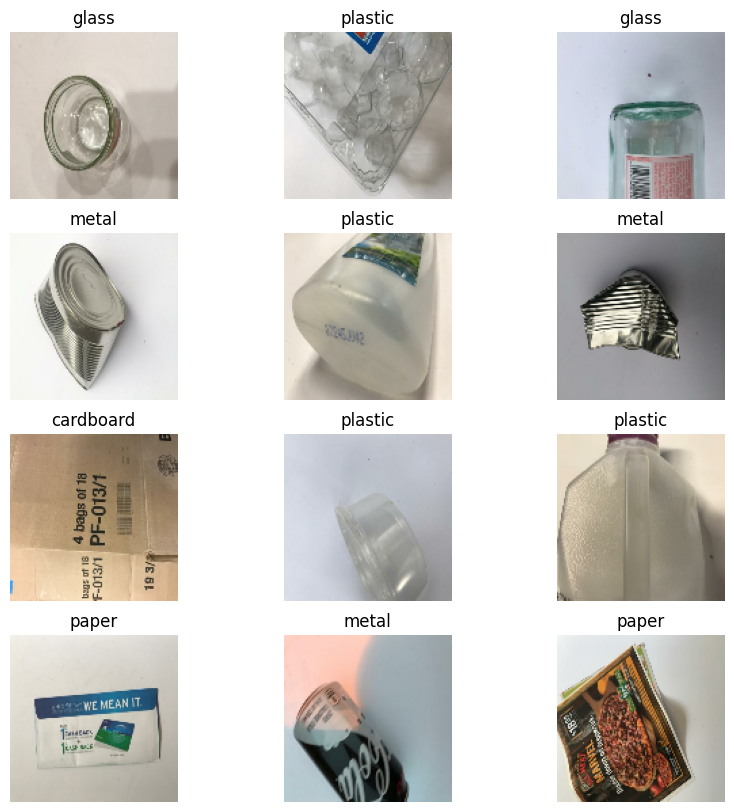

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [31]:
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}
    
    for _, labels in dataset:
        for label in labels.numpy():
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage
    return counts


In [32]:
# Function to plot class distribution
def simple_bar_plot(dist, title):
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [33]:
class_names = train_ds.class_names

# Get class distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k]) / 2, 2)

print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)

{'cardboard': 16.52, 'glass': 19.73, 'metal': 15.92, 'paper': 23.29, 'plastic': 19.44, 'trash': 5.09}
{'cardboard': 13.66, 'glass': 20.2, 'metal': 17.43, 'paper': 24.36, 'plastic': 17.62, 'trash': 6.73}
{'cardboard': 14.06, 'glass': 17.58, 'metal': 16.8, 'paper': 25.0, 'plastic': 19.14, 'trash': 7.42}
{'cardboard': 15.09, 'glass': 19.96, 'metal': 16.68, 'paper': 23.82, 'plastic': 18.53, 'trash': 5.91}


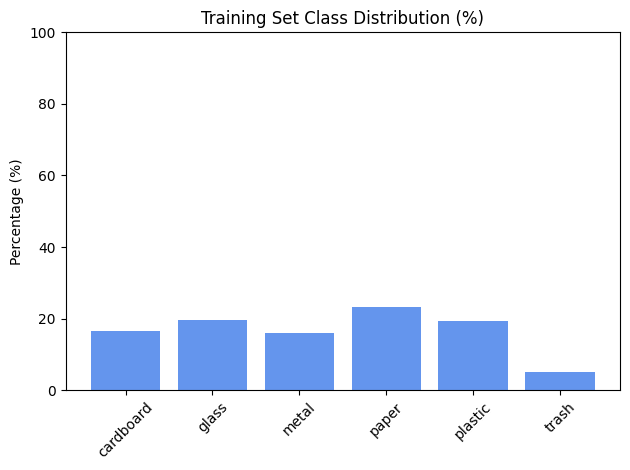

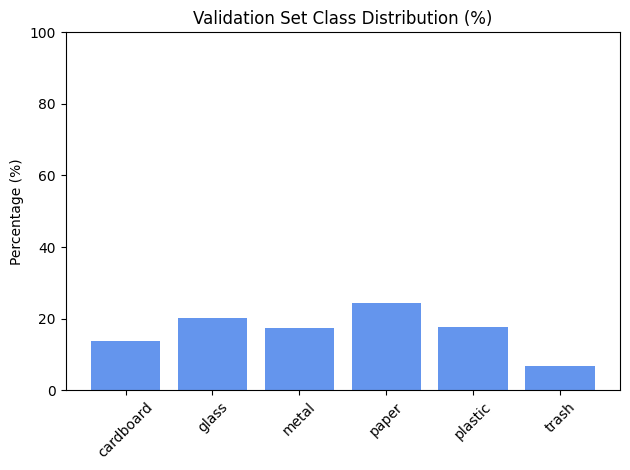

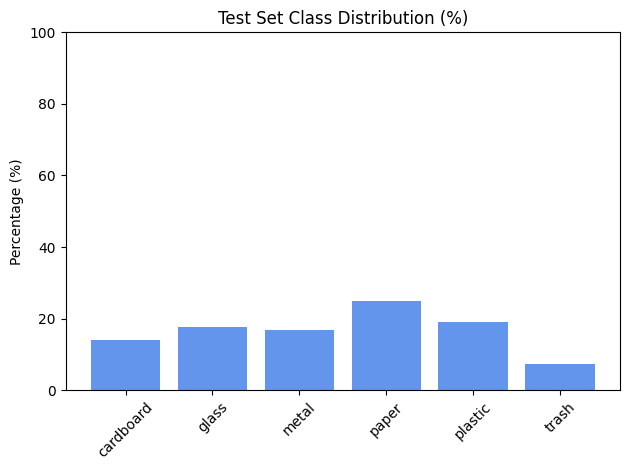

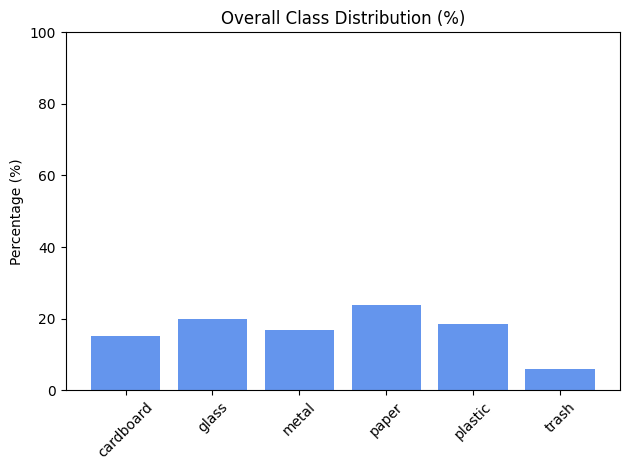

In [34]:
# Show visualizations
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")

In [35]:


# Count class occurrences and prepare label list
class_counts = {i: 0 for i in range(len(class_names))}
all_labels = []

for images, labels in train_ds:
    for label in labels.numpy():
        class_counts[label] += 1
        all_labels.append(label)

# Compute class weights (index aligned)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=all_labels
)

# Create dictionary mapping class index to weight
class_weights = {i: w for i, w in enumerate(class_weights_array)}


In [36]:

# ✅ Optional: print results
print("Class Counts:", class_counts)
print("Class Weights:", class_weights)


Class Counts: {0: 334, 1: 399, 2: 322, 3: 471, 4: 393, 5: 103}
Class Weights: {0: np.float64(1.0089820359281436), 1: np.float64(0.8446115288220551), 2: np.float64(1.046583850931677), 3: np.float64(0.7154989384288747), 4: np.float64(0.8575063613231552), 5: np.float64(3.2718446601941746)}


In [37]:
#  Define data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [38]:
#  Load the pretrained MobileNetV3Small model (without the top classification layer)
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3),include_preprocessing=True, weights='imagenet')


#  Freeze early layers (to retain general pretrained features)
base_model.trainable = True
for layer in base_model.layers[:100]:  # You can adjust this number
    layer.trainable = False



In [39]:

#  Build the final model
model = Sequential([
    layers.Input(shape=(124, 124, 3)),
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # Change to your number of classes
])


In [40]:
# ⚙️ Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [41]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)


In [45]:
epochs = 15

In [48]:
# Set the number of epochs to train the model
epochs = 15  # Number of times the model will go through the entire dataset

# Train the model using the fit function
history = model.fit(
    train_ds,                # Training dataset used to adjust model weights
    validation_data=val_ds,   # Validation dataset to monitor performance on unseen data
    epochs=epochs,           # Number of training cycles, referencing the variable set earlier
    class_weight=class_weights,  # Handles class imbalances by assigning appropriate weights
    batch_size=32,           # Number of samples processed in each training step
    callbacks=[early]        # Implements early stopping to prevent unnecessary training
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.1523 - loss: 1.9200 - val_accuracy: 0.2475 - val_loss: 1.7702
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - accuracy: 0.2279 - loss: 1.8452 - val_accuracy: 0.3050 - val_loss: 1.6964
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.2647 - loss: 1.7430 - val_accuracy: 0.3485 - val_loss: 1.6205
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - accuracy: 0.3056 - loss: 1.6826 - val_accuracy: 0.4099 - val_loss: 1.5473
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.3720 - loss: 1.6215 - val_accuracy: 0.4535 - val_loss: 1.4881
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.4284 - loss: 1.5528 - val_accuracy: 0.4950 - val_loss: 1.4278
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.4212 - loss: 1.5154 - val_accuracy: 0.5426 - val_loss: 1.3710
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.4533 - loss: 1.4567 - val_accu

In [49]:
# 📉 Reduce learning rate when val_loss plateaus
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


In [50]:
model.save("Efficientnetv2b2.keras", save_format="keras")


In [51]:
# 🔧 Fine-tuning the top 20 layers of EfficientNetV2B2
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_epochs = 5
total_epochs = epochs + fine_tune_epochs

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    class_weight=class_weights,
    callbacks=[early, reduce_lr]
)


Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 362ms/step - accuracy: 0.6389 - loss: 1.1240 - val_accuracy: 0.6990 - val_loss: 1.0114 - learning_rate: 1.0000e-05
Epoch 16/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.6292 - loss: 1.1052 - val_accuracy: 0.7129 - val_loss: 0.9922 - learning_rate: 1.0000e-05
Epoch 17/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.6524 - loss: 1.0861 - val_accuracy: 0.7129 - val_loss: 0.9601 - learning_rate: 1.0000e-05
Epoch 18/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.6502 - loss: 1.0579 - val_accuracy: 0.7188 - val_loss: 0.9275 - learning_rate: 1.0000e-05
Epoch 19/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - accuracy: 0.6691 - loss: 1.0071 - val_accuracy: 0.7208 - val_loss: 0.9134 - learning_rate: 1.0000e-05
Epoch 20/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.6753 - loss: 1.0049 - val_accuracy: 0.7267 - val_loss: 0.8963 - learning_rate: 1.0000e-05


In [52]:
# 📝 Summary (optional but useful)
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 124, 124, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         8,454 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,719,898 (40.89 MB)

 Trainable params: 971,034 (3.70 MB)

 Non-trainable params: 7,806,794 (29.78 MB)

 Optimizer params: 1,942,070 (7.41 MB)

In [63]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 124, 124,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 124, 124,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 124, 124,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 62, 62,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 62, 62,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 62, 62,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 62, 62,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 62, 62,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 62, 62,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 62, 62,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 62, 62,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 62, 62,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 31, 31,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 31, 31,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 31, 31,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 962,580 (3.67 MB)

 Non-trainable params: 7,806,794 (29.78 MB)

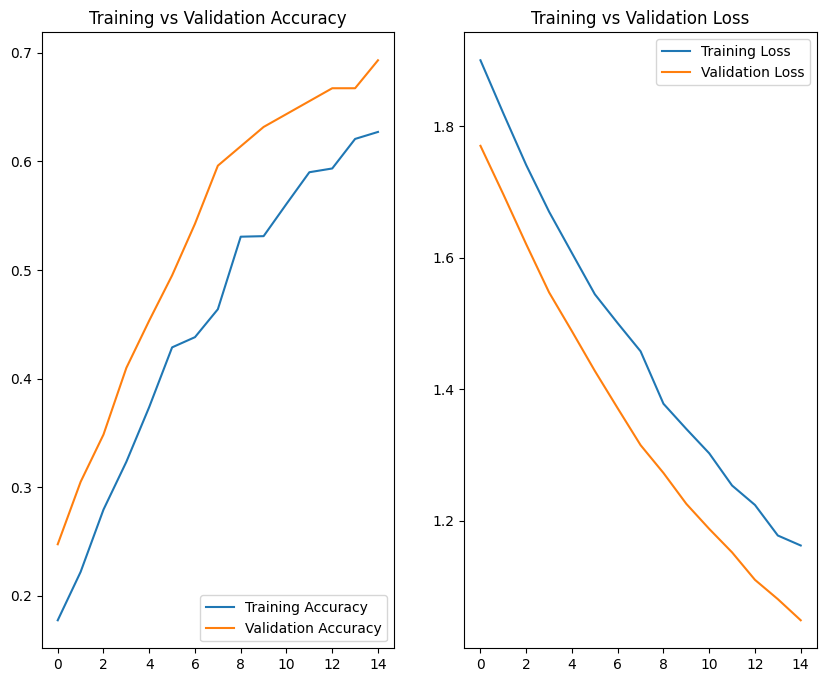

In [64]:

acc = history.history['accuracy']          # Extract training accuracy from history
val_acc = history.history['val_accuracy']  # Extract validation accuracy from history
loss = history.history['loss']             # Extract training loss from history
val_loss = history.history['val_loss']     # Extract validation loss from history

epochs_range = range(len(acc))             # Define range for epochs based on accuracy length

plt.figure(figsize=(10,8))                 # Set overall figure size for visualization

plt.subplot(1,2,1)                         # Create first subplot (1 row, 2 columns, position 1)
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Place legend in lower-right corner
plt.title('Training vs Validation Accuracy') # Add title for accuracy plot

plt.subplot(1,2,2)                         # Create second subplot (1 row, 2 columns, position 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')              # Place legend in upper-right corner
plt.title('Training vs Validation Loss')   # Add title for loss plot

plt.show()                                 # Display the plots

In [65]:
loss, accuracy = model.evaluate(test_ds_eval)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.7647 - loss: 0.8639
Test accuracy is0.7344, Test loss is 0.8928


In [66]:
# Extract true labels from all batches in the test dataset
y_true = np.concatenate([y.numpy() for x, y in test_ds_eval], axis=0)  # Convert Tensor labels to NumPy array and concatenate them

# Get predictions as probabilities from the model
y_pred_probs = model.predict(test_ds_eval)  # Predict class probabilities for each sample in the test dataset

# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)  # Select the class with the highest probability for each sample

# Compute the confusion matrix to evaluate classification performance
cm = confusion_matrix(y_true, y_pred)  # Generate confusion matrix comparing true labels to predicted labels

# Print metrics to assess model performance
print(cm)  # Display confusion matrix
print(classification_report(y_true, y_pred))  # Print precision, recall, and F1-score for each class 
print(classification_report(y_true, y_pred, target_names=class_names))



8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step
[[31  0  0  3  0  0]
 [ 0 32  7  0  6  0]
 [ 0  7 37  1  0  4]
 [ 9  2  1 46  1  6]
 [ 2  7  0  2 30  1]
 [ 3  1  3  0  2 12]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        34
           1       0.65      0.71      0.68        45
           2       0.77      0.76      0.76        49
           3       0.88      0.71      0.79        65
           4       0.77      0.71      0.74        42
           5       0.52      0.57      0.55        21

    accuracy                           0.73       256
   macro avg       0.71      0.73      0.72       256
weighted avg       0.75      0.73      0.74       256

              precision    recall  f1-score   support

   cardboard       0.69      0.91      0.78        34
       glass       0.65      0.71      0.68        45
       metal       0.77      0.76      0.76        49
       paper       0.88      0.71      0.79        65
     plastic       0

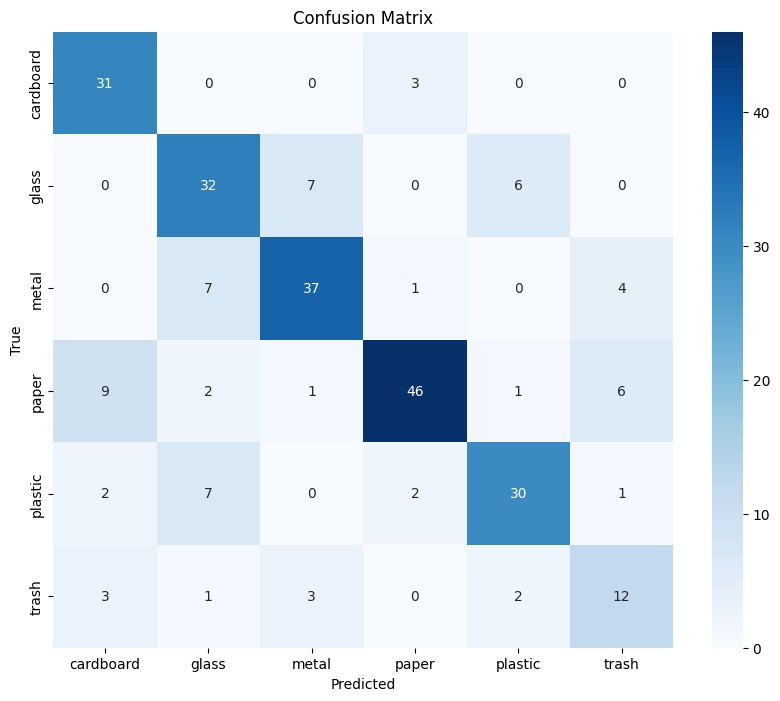

In [67]:
plt.figure(figsize=(10,8))  # Set figure size for better visualization

sns.heatmap(cm, annot=True, fmt='d',  # Create heatmap using confusion matrix
            xticklabels=class_names,  # Set class names for x-axis (predicted labels)
            yticklabels=class_names,  # Set class names for y-axis (true labels)
            cmap='Blues')  # Use a blue colormap for better contrast

plt.xlabel('Predicted')  # Label x-axis as Predicted classes
plt.ylabel('True')  # Label y-axis as True classes
plt.title('Confusion Matrix')  # Add title to the heatmap
plt.show()  # Display the plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


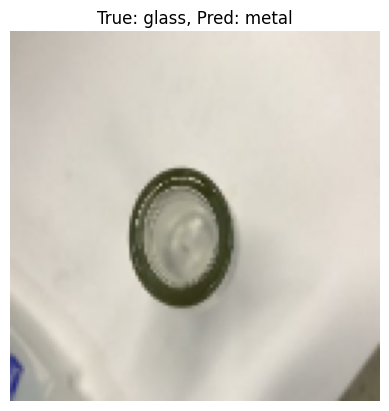

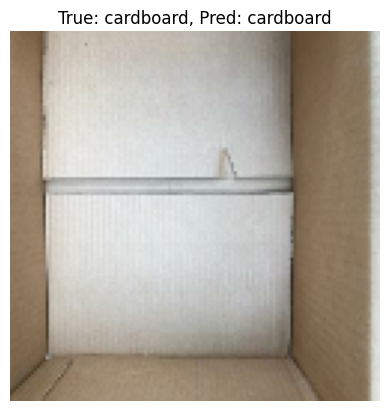

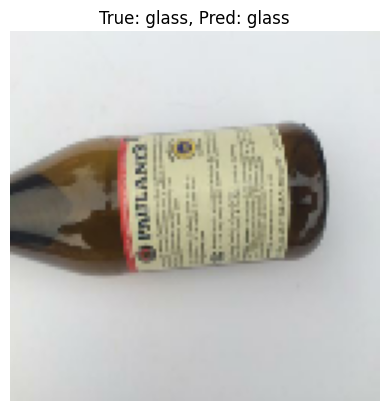

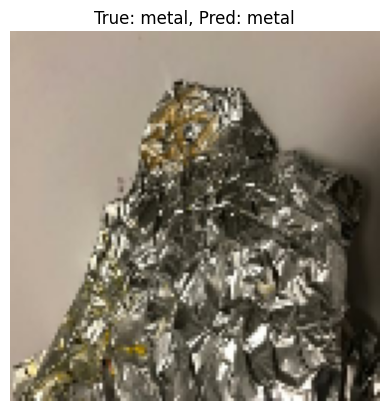

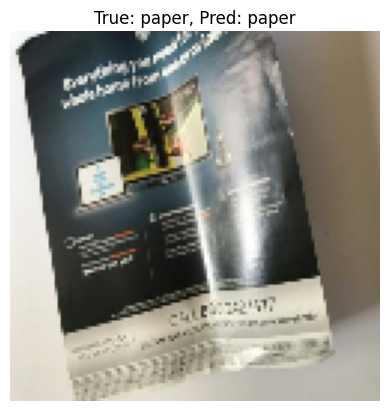

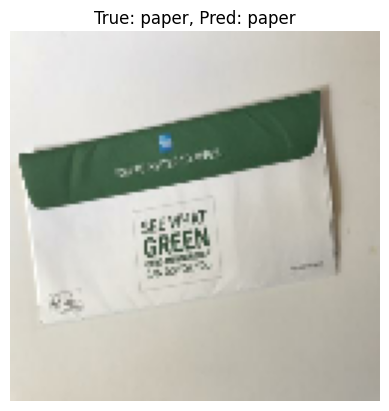

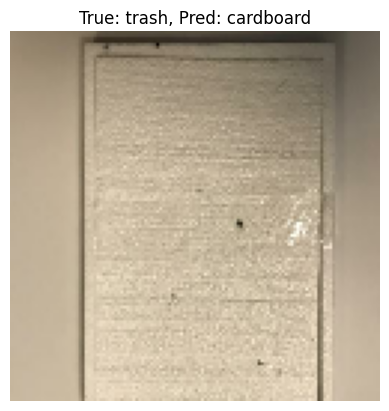

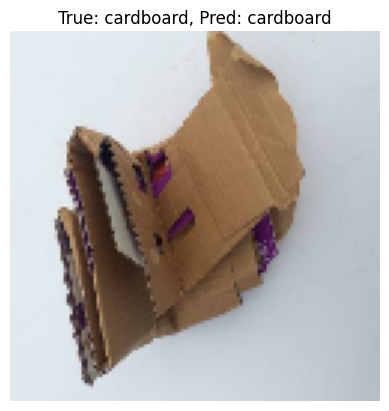

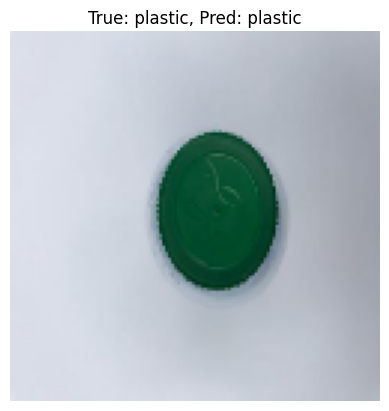

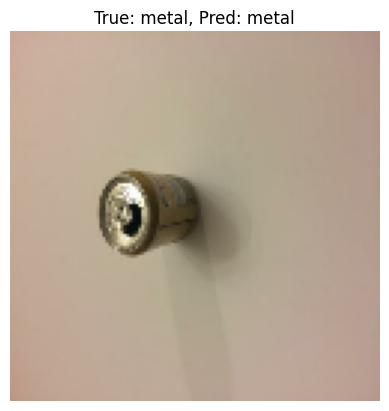

In [68]:
# Extract class names from the training dataset
class_names = train_ds.class_names  

# Take one batch of images and labels from the test dataset for evaluation
for images, labels in test_ds_eval.take(1):  

    # Generate predictions for the batch of images
    predictions = model.predict(images)  

    # Get the predicted class index for each image
    pred_labels = tf.argmax(predictions, axis=1)  

    # Loop through the first 8 images in the batch
    for i in range(10):  
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert and display image
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")  # Show actual and predicted class
        plt.axis("off")  # Hide axes for better visualization
        plt.show()  # Display the image with title

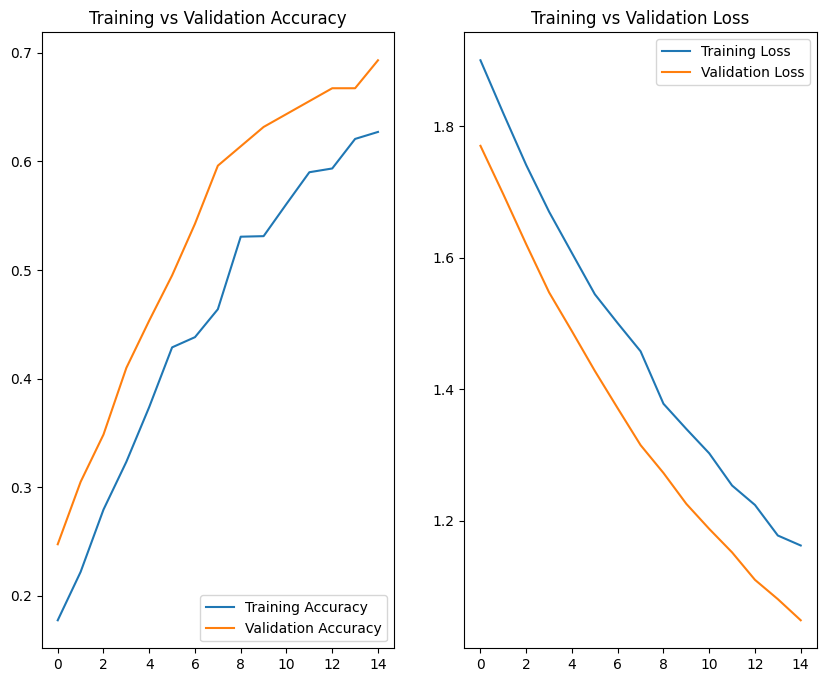

In [69]:
acc = history.history['accuracy']          # Extract training accuracy from history
val_acc = history.history['val_accuracy']  # Extract validation accuracy from history
loss = history.history['loss']             # Extract training loss from history
val_loss = history.history['val_loss']     # Extract validation loss from history

epochs_range = range(len(acc))             # Define range for epochs based on accuracy length

plt.figure(figsize=(10,8))                 # Set overall figure size for visualization

plt.subplot(1,2,1)                         # Create first subplot (1 row, 2 columns, position 1)
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Place legend in lower-right corner
plt.title('Training vs Validation Accuracy') # Add title for accuracy plot

plt.subplot(1,2,2)                         # Create second subplot (1 row, 2 columns, position 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')              # Place legend in upper-right corner
plt.title('Training vs Validation Loss')   # Add title for loss plot

plt.show()                                 # Display the plots

In [70]:
# Save model in Keras format with architecture, weights, and training configuration
model.save('Effiicientnetv2b2.keras')

# Load your Keras model
model = tf.keras.models.load_model('Effiicientnetv2b2.keras')

In [71]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [72]:
def classify_image(img):  
    # Resize image to 124x124 pixels (Note: Comment says 128x128, but code resizes to 124x124)
    img = img.resize((124, 124))  
    
    # Convert image to a NumPy array with float32 dtype
    img_array = np.array(img, dtype=np.float32)  
    img_array = preprocess_input(img_array)
    
    # Expand dimensions to match model input shape (adds a batch dimension)
    img_array = np.expand_dims(img_array, axis=0)  
    
    # Make a prediction using the trained model
    prediction = model.predict(img_array)  
    
    # Get the index of the highest predicted probability
    predicted_class_index = np.argmax(prediction)  
    
    # Map the predicted index to its corresponding class name
    predicted_class_name = class_names[predicted_class_index]  
    
    # Extract confidence score (probability of the predicted class)
    confidence = prediction[0][predicted_class_index]  
    
    # Return formatted prediction result with confidence score
    return f"Predicted: {predicted_class_name} (Confidence: {confidence:.2f})"  

In [73]:
import tensorflow as tf
import cv2

def get_gradcam(model, img_array, class_index, last_conv_layer_name="top_activation"):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # Resize heatmap to original image size
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))
    heatmap = np.uint8(255 * heatmap)

    # Apply colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    return heatmap


In [74]:
import gradio as gr
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from gtts import gTTS
import tempfile
import os

# 📦 Disposal tips
tips = {
    "plastic": "Rinse before recycling. Avoid black plastic.",
    "glass": "Remove lids. Don’t break it.",
    "metal": "Crush cans to save space.",
    "paper": "Keep it dry. No oil-soaked paper.",
    "cardboard": "Flatten it. Avoid food stains.",
    "trash": "Dispose responsibly. Not recyclable."
}

# Preprocess function
def preprocess_image(img):
    img = img.resize(image_size)  # example: (224, 224)
    img = np.array(img)
    return np.expand_dims(img, axis=0)

# Main prediction function
def classify_image(input_img):
    img = preprocess_image(input_img)
    preds = model.predict(img)[0]  # prediction vector

    # Top 3 predictions
    top3_indices = preds.argsort()[-3:][::-1]
    top3 = [(class_names[i], preds[i]) for i in top3_indices]

    result_text = "🔍 Top 3 Predictions:\n"
    for name, score in top3:
        result_text += f"{name}: {score:.2%}\n"

    # Recyclable or trash
    recyclable = {"paper", "plastic", "glass", "metal", "cardboard"}
    top_label = top3[0][0]
    is_recyclable = "♻️ Recyclable" if top_label in recyclable else "🚯 Trash"
    result_text += f"\nPrediction Type: {is_recyclable}"

    # Tip
    tip = tips[top_label]
    result_text += f"\n\n🧠 Tip: {tip}"

    # Voice output
    voice_msg = f"This image is classified as {top_label}. It is {is_recyclable.replace('♻️ ', '').replace('🚯 ', '')}."
    tts = gTTS(text=voice_msg)
    temp_audio_path = os.path.join(tempfile.gettempdir(), "prediction.mp3")
    tts.save(temp_audio_path)

    # Plot confidence
    fig, ax = plt.subplots()
    ax.bar(class_names, preds, color="skyblue")
    ax.set_title("Prediction Confidence")
    ax.set_ylabel("Confidence")
    ax.set_ylim([0, 1])
    plt.xticks(rotation=45)

    return result_text, fig, temp_audio_path

# Gradio interface with audio
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil", label="Upload or Capture an Image"),
    outputs=[
        "text", 
        gr.Plot(label="Class Confidence"), 
        gr.Audio(label="Prediction Voice", autoplay=True)

    ],
    title="🗑️ Garbage Classifier",
    description="Upload an image of waste and let the model predict the category: cardboard, glass, metal, paper, plastic, or trash."
).launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
